# Project

## Data Cleaning and Imputation

We begin by loading the dataset, and showing a few of the matches to prove the data has been loaded.

In [4]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head(5)

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


### Missing Stances and Referee

Some of the matches feature fighters with missing stance information or missing referee information. Since this is a relatively small number of matches out of the whole dataset, we will drop these matches from our consideration.

In [5]:
# Show number of matches in dataset before removing matches with missing stance information
print('Number of matches prior to filtering: ' + str(len(df)))

# Remove matches with missing stance information
filter1 = df[df['B_Stance'].notnull()]
filter2 = filter1[filter1['R_Stance'].notnull()]
filter3 = filter2[filter2['Referee'].notnull()]
df = filter3
print('Number of matchs after filtering: ' + str(len(filter3)))

Number of matches prior to filtering: 5144
Number of matchs after filtering: 4865


### Missing Numerical Data

Many of the rows contain missing numerical data in certain columns. We will fill in these columns with the median for that column.

First we will find columns with missing numerical data to demonstrate that our imputation is successful.

In [6]:
df.columns[df.isnull().any()]

Index(['B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_CLINCH_att',
       'B_avg_CLINCH_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed',
       'B_avg_GROUND_att', 'B_avg_GROUND_landed', 'B_avg_HEAD_att',
       'B_avg_HEAD_landed',
       ...
       'R_avg_opp_SUB_ATT', 'R_avg_opp_TD_att', 'R_avg_opp_TD_landed',
       'R_avg_opp_TD_pct', 'R_avg_opp_TOTAL_STR_att',
       'R_avg_opp_TOTAL_STR_landed', 'R_total_time_fought(seconds)',
       'R_Reach_cms', 'B_age', 'R_age'],
      dtype='object', length=104)

We select R_age for our demonstration. Now we find a few rows that have a missing R_age.

In [7]:
people = df[df['R_age'].isnull()].head(5)
people

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4171,Per Eklund,Samy Schiavo,Leon Roberts,2008-10-18,"Birmingham, England, United Kingdom",Red,False,Lightweight,3,1.0,...,0.0,0.0,0.0,0.0,Orthodox,177.80,182.88,155.0,32.0,NaN
4376,Jess Liaudin,Anthony Torres,Mario Yamasaki,2007-09-08,"London, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,1.0,0.0,1.0,Orthodox,175.26,182.88,170.0,29.0,NaN
4438,Jess Liaudin,Dennis Siver,Steve Mazzagatti,2007-04-21,"Manchester, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,175.26,182.88,170.0,28.0,NaN
4767,Keith Rockel,Chris Liguori,John McCarthy,2003-11-21,"Uncasville, Connecticut, USA",Red,False,Middleweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,182.88,NaN,185.0,NaN,NaN
4908,Ben Earwood,Chris Lytle,Mario Yamasaki,2000-11-17,"Atlantic City, New Jersey, USA",Red,False,Welterweight,2,0.0,...,0.0,0.0,0.0,0.0,Orthodox,172.72,NaN,170.0,26.0,NaN


Now we find the median for that column.

In [8]:
df['R_age'].median()

29.0

Now we apply fillna to the entire dataset, and show that the column is filled in with the median.

In [9]:
df = df.fillna(df.median())
df.loc[people.index.tolist()]

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4171,Per Eklund,Samy Schiavo,Leon Roberts,2008-10-18,"Birmingham, England, United Kingdom",Red,False,Lightweight,3,1.0,...,0.0,0.0,0.0,0.0,Orthodox,177.80,182.88,155.0,32.0,29.0
4376,Jess Liaudin,Anthony Torres,Mario Yamasaki,2007-09-08,"London, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,1.0,0.0,1.0,Orthodox,175.26,182.88,170.0,29.0,29.0
4438,Jess Liaudin,Dennis Siver,Steve Mazzagatti,2007-04-21,"Manchester, England, United Kingdom",Red,False,Welterweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,175.26,182.88,170.0,28.0,29.0
4767,Keith Rockel,Chris Liguori,John McCarthy,2003-11-21,"Uncasville, Connecticut, USA",Red,False,Middleweight,3,0.0,...,0.0,0.0,0.0,0.0,Orthodox,182.88,185.42,185.0,29.0,29.0
4908,Ben Earwood,Chris Lytle,Mario Yamasaki,2000-11-17,"Atlantic City, New Jersey, USA",Red,False,Welterweight,2,0.0,...,0.0,0.0,0.0,0.0,Orthodox,172.72,185.42,170.0,26.0,29.0


### Dimensionality Reduction-PCA ### 

We apply dimensionality reduction to obtain an ordered list of components that account for the largest variance in the data set and ultimately group similar fighters based on their fighting styles



In [174]:
df_new=df.drop(columns=["R_fighter","B_fighter","Referee","date","location","Winner","title_bout","weight_class","B_Stance","R_Stance"])
#pd.set_option('display.max_rows', 999)


In [175]:
from sklearn import (cluster, datasets, decomposition, ensemble, manifold, random_projection)

pca = decomposition.PCA(n_components=8)
X_pca=pca.fit_transform(df_new)
X_pca
print(pca.explained_variance_ratio_)


[0.48580999 0.3601545  0.04796335 0.03418453 0.01828115 0.01379265
 0.01128048 0.00454691]


In [176]:
len(X_pca)

4865

Text(0.5, 1.0, 'Scree Plot for the Digits Dataset')

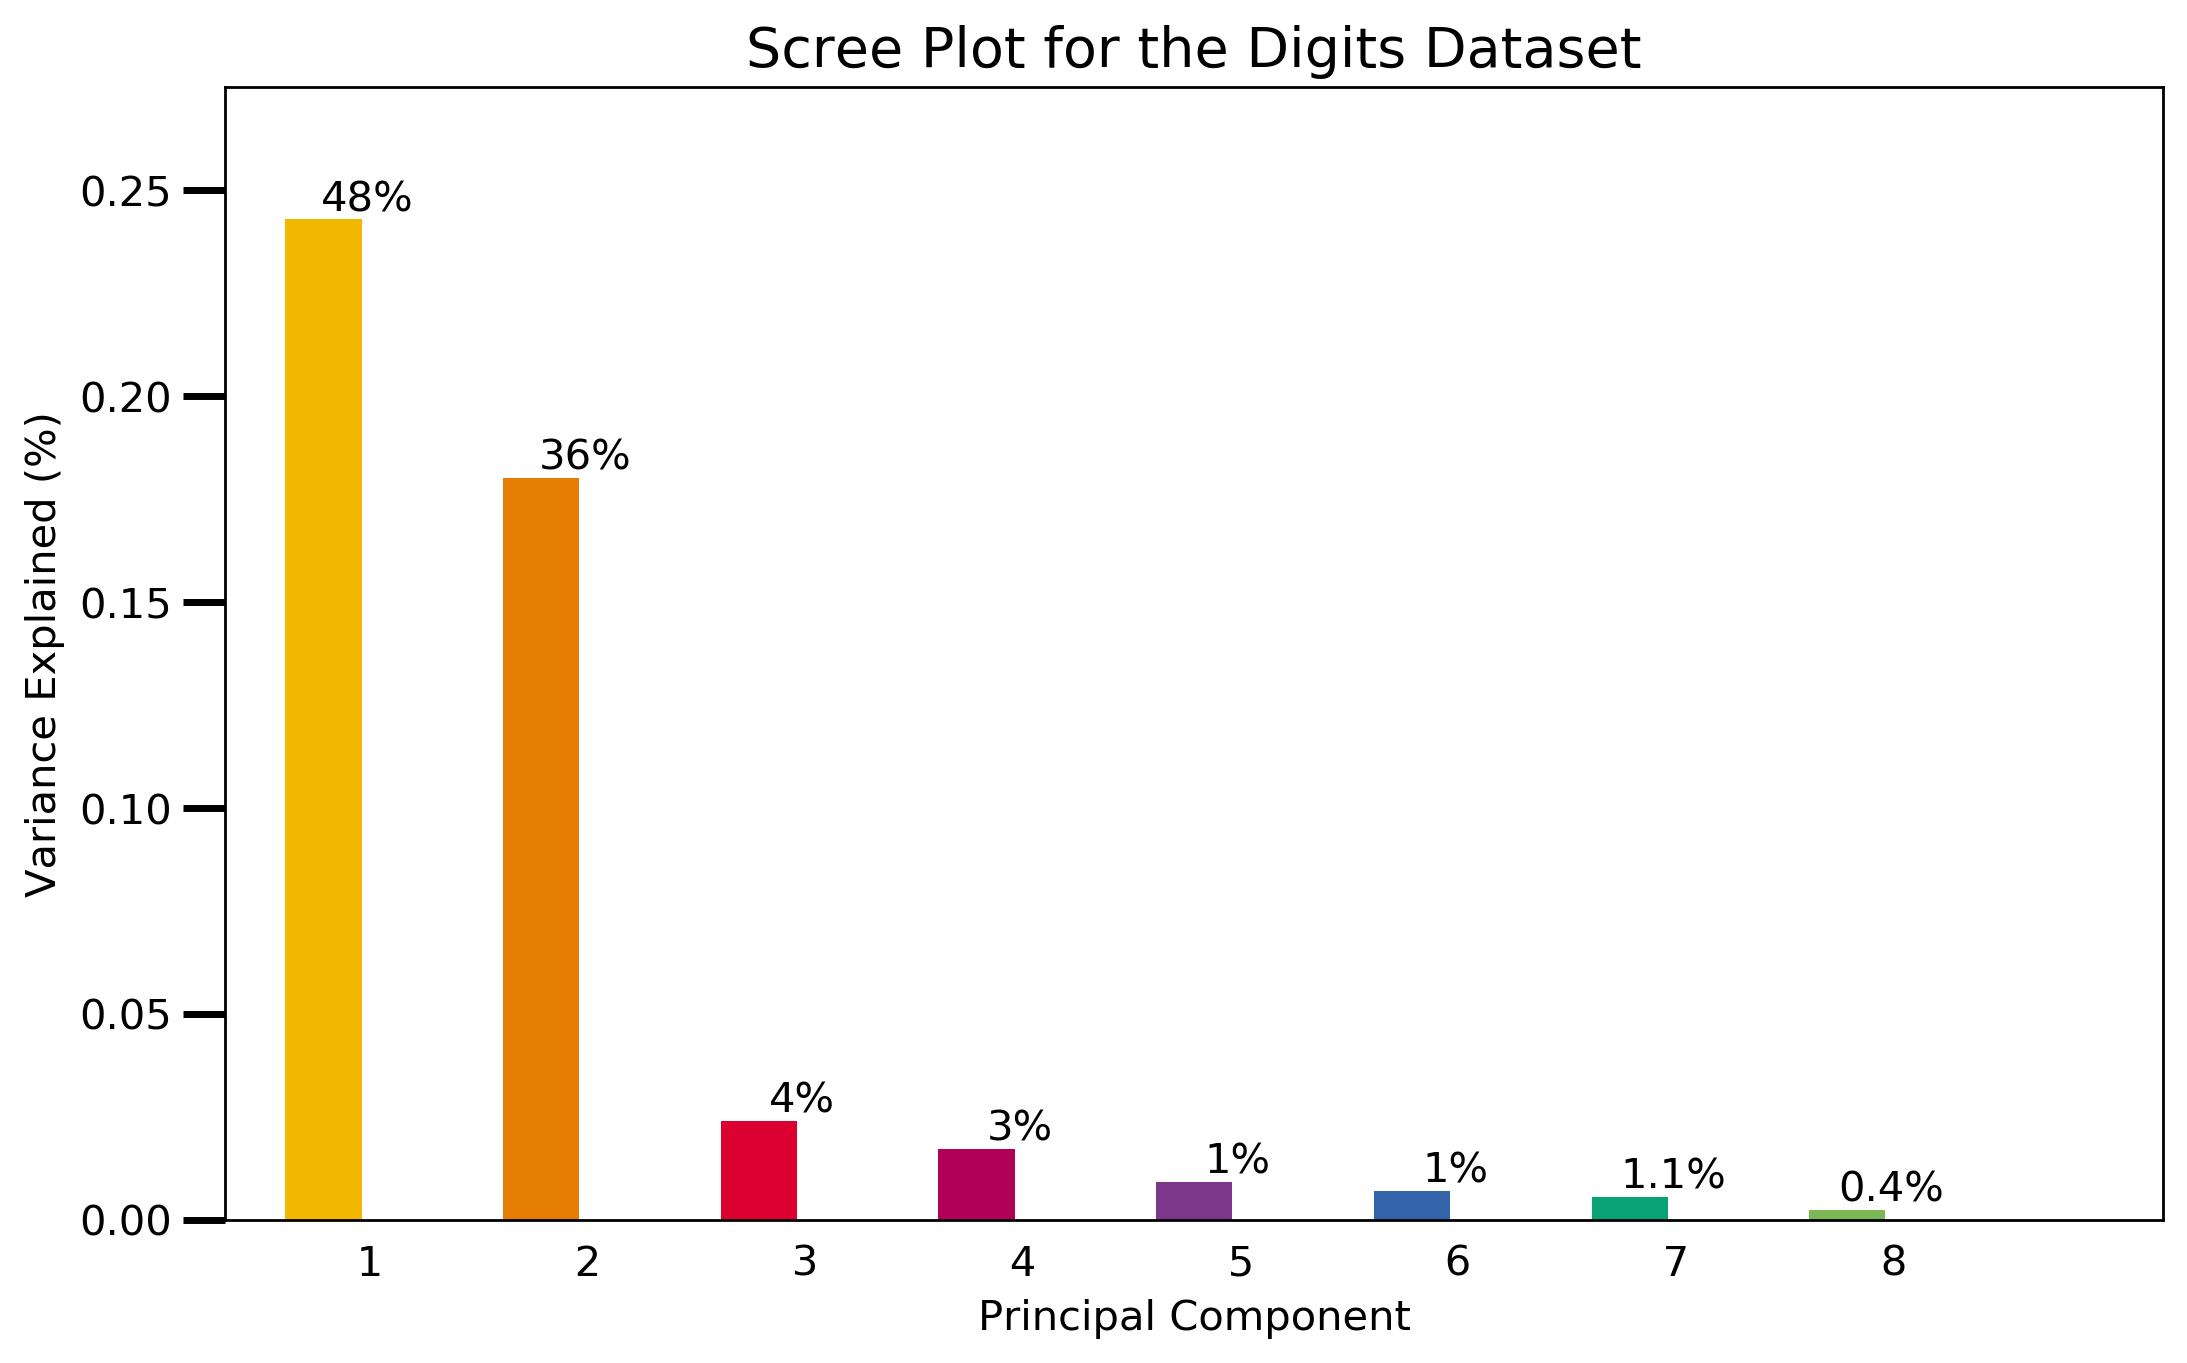

In [178]:
import numpy as np
import pylab as pl
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D 
# Generate scree plot

N = 8
ind = np.arange(N)  # the x locations for the groups

vals = [0.48580999,
        0.3601545,
        0.04796335,
        0.03418453,
        0.01828115,
        0.01379265,
        0.01128048, 
        0.00454691]


pl.figure(figsize=(10, 6), dpi=250)
ax = pl.subplot(111)
ax.bar(ind, pca.explained_variance_ratio_, 0.35, 
       color=[(0.949, 0.718, 0.004),
              (0.898, 0.49, 0.016),
              (0.863, 0, 0.188),
              (0.694, 0, 0.345),
              (0.486, 0.216, 0.541),
              (0.204, 0.396, 0.667),
              (0.035, 0.635, 0.459),
              (0.486, 0.722, 0.329),
             ])

ax.annotate(r"%d%%" % (int(vals[0]*100)), (ind[0]+0.2, vals[0]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[1]*100)), (ind[1]+0.2, vals[1]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[2]*100)), (ind[2]+0.2, vals[2]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[3]*100)), (ind[3]+0.2, vals[3]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[4]*100)), (ind[4]+0.2, vals[4]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%d%%" % (int(vals[5]*100)), (ind[5]+0.2, vals[5]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%s%%" % ((str(vals[6]*100)[:4 + (0-1)])), (ind[6]+0.2, vals[6]), va="bottom", ha="center", fontsize=12)
ax.annotate(r"%s%%" % ((str(vals[7]*100)[:4 + (0-1)])), (ind[7]+0.2, vals[7]), va="bottom", ha="center", fontsize=12)

ax.set_xticklabels(('       0',
                    '       1',
                    '       2',
                    '       3',
                    '       4',
                    '       5',
                    '       6',
                    '       7',
                    '       8'), 
                   fontsize=12)
ax.set_yticklabels(('0.00', '0.05', '0.10', '0.15', '0.20', '0.25','0.35','0.45','0.55'), fontsize=12)
ax.set_ylim(0, .55)
ax.set_xlim(0-0.45, 8+0.45)

ax.xaxis.set_tick_params(width=0)
ax.yaxis.set_tick_params(width=2, length=12)

ax.set_xlabel("Principal Component", fontsize=12)
ax.set_ylabel("Variance Explained (%)", fontsize=12)

pl.title("Scree Plot for the Digits Dataset", fontsize=16)

In [189]:

# Compute (two-dimensional) PCA on the digits dataset

#print("Computing PCA projection..."),
pca_new = decomposition.PCA(n_components=2)
X_pca_new = pca.fit_transform(df_new)
X_pca_new

principalDf = pd.DataFrame(data = X_pca_new
             , columns = ['principal component 1', 'principal component 2'])
# Plot PCA result
#plot_embedding(X_pca, "Principal Components Projection of the Digits Dataset\n")

In [192]:
pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 6000)
finalDf = pd.concat([principalDf, df[['Winner']]], axis = 1)
finalDf

,principal component 1,principal component 2,Winner
0,37.893370,235.715566,Red
1,577.895484,28.037571,Red
2,51.023040,7.706172,Red
3,169.703879,-21.664058,Blue
4,261.221528,-668.864409,Blue
5,99.686165,136.425778,NaN
6,347.528143,18.525466,Red
7,115.086676,-116.577769,Blue
8,525.009152,29.688059,Blue
9,41.331999,168.666203,Red


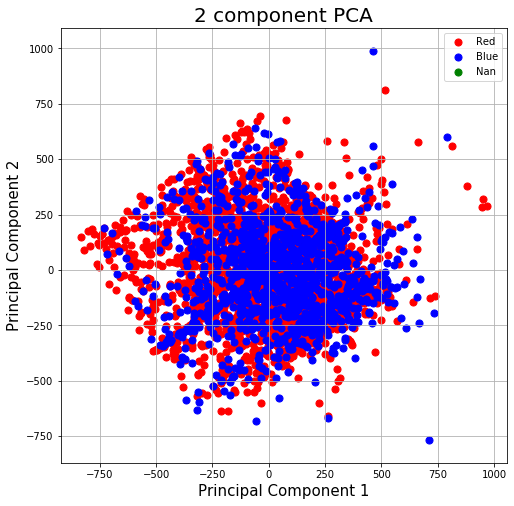

In [195]:
 import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Red', 'Blue','Nan']
colors = ['r', 'b','g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Winner'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()